Nguyễn Duy Tùng

MACHINE LEARNING MIDTERM 2023

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
from mpl_toolkits import mplot3d
# sys.stdout.reconfigure(encoding = 'utf-8')

In [33]:
"""
:param open file wine1.data
"""
with open('wine1.data', 'r') as file:
    file_read = file.read()
    print(file_read)

1	14.23	1.71	2.43	15.6	127	2.8	3.06	0.28	2.29	5.64	1.04	3.92	1065
1	13.2	1.78	2.14	11.2	100	2.65	2.76	0.26	1.28	4.38	1.05	3.4	1050
1	13.16	2.36	2.67	18.6	101	2.8	3.24	0.3	2.81	5.68	1.03	3.17	1185
1	14.37	1.95	2.5	16.8	113	3.85	3.49	0.24	2.18	7.8	0.86	3.45	1480
1	13.24	2.59	2.87	21	118	2.8	2.69	0.39	1.82	4.32	1.04	2.93	735
1	14.2	1.76	2.45	15.2	112	3.27	3.39	0.34	1.97	6.75	1.05	2.85	1450
1	14.39	1.87	2.45	14.6	96	2.5	2.52	0.3	1.98	5.25	1.02	3.58	1290
1	14.06	2.15	2.61	17.6	121	2.6	2.51	0.31	1.25	5.05	1.06	3.58	1295
1	14.83	1.64	2.17	14	97	2.8	2.98	0.29	1.98	5.2	1.08	2.85	1045
1	13.86	1.35	2.27	16	98	2.98	3.15	0.22	1.85	7.22	1.01	3.55	1045
1	14.1	2.16	2.3	18	105	2.95	3.32	0.22	2.38	5.75	1.25	3.17	1510
1	14.12	1.48	2.32	16.8	95	2.2	2.43	0.26	1.57	5	1.17	2.82	1280
1	13.75	1.73	2.41	16	89	2.6	2.76	0.29	1.81	5.6	1.15	2.9	1320
1	14.75	1.73	2.39	11.4	91	3.1	3.69	0.43	2.81	5.4	1.25	2.73	1150
1	14.38	1.87	2.38	12	102	3.3	3.64	0.29	2.96	7.5	1.2	3	1547
1	13.63	1.81	2.7	17.2	112	2.85	2.91	0.3	1.46	

In [34]:
"""
:param chuyển wine1.data sang wine1.csv
"""
column_names = [
    "Cultivars",
    "Alcohol",
    "Malic acid",
    "Ash",
    "Alcalinity of ash",
    "Magnesium",
    "Total phenols",
    "Flavanoids",
    "Nonflavanoid phenols",
    "Proanthocyanins",
    "Color intensity",
    "Hue",
    "OD280/OD315 of diluted wines",
    "Proline"
]
df = pd.read_csv('wine1.data', sep='\t', names=column_names)
df.to_csv('wine1.csv', index= False)
data = pd.read_csv('wine1.csv')
data

,Cultivars,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


PART 1

In [35]:
data = pd.read_csv('wine1.csv')
selected_cultivar = data[data['Cultivars'] == 1]
X = selected_cultivar['Flavanoids'].values
y = selected_cultivar['Alcohol'].values
sorted_index = np.argsort(X)
X_s = X[sorted_index]
y_s = y[sorted_index]
print(X_s)
print(y_s)

[2.19 2.33 2.37 2.41 2.43 2.43 2.51 2.52 2.53 2.61 2.63 2.64 2.65 2.68
 2.68 2.68 2.69 2.69 2.74 2.76 2.76 2.78 2.79 2.88 2.9  2.91 2.92 2.94
 2.97 2.98 2.98 2.99 3.   3.   3.03 3.04 3.06 3.14 3.15 3.17 3.17 3.19
 3.23 3.24 3.25 3.27 3.29 3.32 3.39 3.39 3.4  3.49 3.54 3.56 3.64 3.67
 3.69 3.74 3.93]
[13.3  14.02 12.85 12.93 13.05 14.12 14.06 14.39 13.51 13.5  13.24 13.07
 14.21 13.28 13.41 13.05 13.24 13.68 13.76 13.75 13.2  13.56 13.77 13.71
 13.74 13.63 14.1  13.39 13.87 14.83 13.48 13.83 14.22 13.05 13.64 14.22
 14.23 14.3  13.86 14.06 14.38 13.58 13.29 13.16 13.73 13.05 13.56 14.1
 14.2  13.9  13.83 14.37 13.94 13.88 14.38 13.72 14.75 13.82 14.19]


In [36]:
def Sum_Object(array, n):
    if n <= 0:
        return 0
    return array[n-1] + Sum_Object(array, n - 1)

def Sum_pow(array, n):
    if n <= 0:
        return 0
    return pow(array[n - 1], 2) + Sum_pow(array, n - 1)

def Mul_X_y(X, y, n):
	if n <= 0:
		return 0
	return X[n - 1] * y[n - 1] + Mul_X_y(X, y, n - 1)

def constant_m(x, y, x_2, x_y, n):
	return (n * x_y - x * y) / (n * x_2 - x**2)

def constant_c(x, y, x_2, x_y, n):
	return (y * x_2 - x * x_y) / (n * x_2 - x**2)

def Y_pred(array, m, c):
	temp = []
	for i in range(len(array)):
		y = m * array + c
		temp = np.append(temp, y)
	return temp

def diff(y, pred):
	temp = []
	for i in range(len(y)):
		diffenre = y[i] - pred[i]
		temp = np.append(temp, diffenre)
	return temp

In [37]:
a = Sum_Object(X, len(X))
b = Sum_pow(X, len(X))
c = Sum_Object(y, len(y))
d = Sum_pow(y, len(y))
e = Mul_X_y(X, y, 59)
f = constant_m(a, c, b, e, len(X))
g = constant_c(a, c, b, e, len(X))
print("Tổng X: ", a)
print("Tổng bình phương X: ", b)
print("Tổng y: ", c)
print("Tổng bình phương y: " , d)
print("Tổng tích của X và y: ", e)
print("Hằng số m: ", f)
print("Hằng số c: ", g)

Tổng X:  175.95999999999998
Tổng bình phương X:  533.9424000000001
Tổng y:  810.94
Tổng bình phương y:  11158.550599999997
Tổng tích của X và y:  2422.9459
Hằng số m:  0.48236609454764207
Hằng số c:  12.306150203447434


In [38]:
"""
:param Liner Regression y = m*x + c
"""
y_pred = Y_pred(X, f, g)
print("Y pred: ", y_pred)
h = diff(y, y_pred)
print("Vi sai y - y pred: ", h)
j = Sum_pow(h, len(h))
print("Kết quả lấy mãu: ", j)

Y pred:  [13.78219045 13.63748062 13.86901635 ... 13.75324849 13.86419269
 14.07643377]
Vi sai y - y pred:  [ 0.44780955 -0.43748062 -0.70901635  0.38039213 -0.363715    0.25862874
  0.86828724  0.5431109   1.08639883  0.0343966   0.19239436  0.64170019
  0.11251938  0.66391891  0.31803721 -0.07983554  0.47922026 -0.11619492
 -0.01184896 -0.12771947  0.22474928 -0.53865249  0.01463544 -0.59935785
 -0.06512571 -0.54889134 -0.33430652 -0.06253195  0.1312225   0.5899368
 -0.14384001 -0.26489805  0.076285    0.1321667  -0.01653642 -0.26360117
 -0.31889134 -0.42829981 -0.50959669  0.44745687 -0.33313465 -0.18889134
 -0.1433735  -0.33477303 -0.70324849  0.62557965  0.54474928 -0.04137126
  0.3853408  -0.07372618 -0.83348733  0.08157517 -0.2901994   0.11804839
  0.03498812 -0.08712795  0.46675151 -0.57419269 -0.35643377]
Kết quả lấy mãu:  10.25420293313975


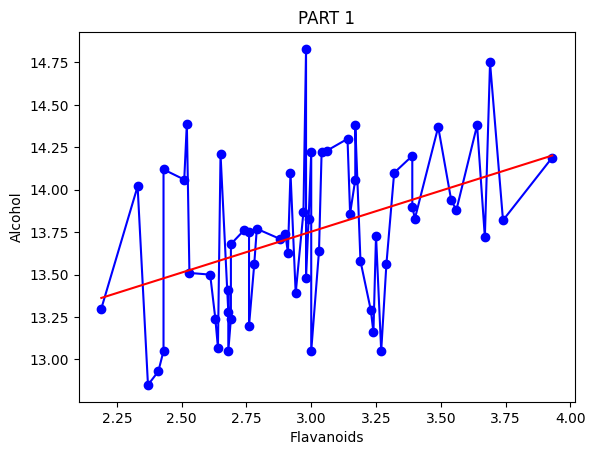

In [39]:
X_sorted, y_pred_sorted = zip(*sorted(zip(X, y_pred)))
plt.scatter(X_s, y_s, color='blue')
plt.plot(X_s, y_s, color='blue')
# plt.scatter(X_sorted, y_pred_sorted, label='Predicted Data', color='red')
plt.plot(X_sorted, y_pred_sorted, color='red')
plt.xlabel('Flavanoids')
plt.ylabel('Alcohol')
plt.title('PART 1')
plt.show()

PART 2

In [40]:
X = selected_cultivar[['Ash', 'Flavanoids']].head(12)
y = selected_cultivar[['Alcohol']].head(12)
print(X)
print(y)

     Ash  Flavanoids
0   2.43        3.06
1   2.14        2.76
2   2.67        3.24
3   2.50        3.49
4   2.87        2.69
5   2.45        3.39
6   2.45        2.52
7   2.61        2.51
8   2.17        2.98
9   2.27        3.15
10  2.30        3.32
11  2.32        2.43
    Alcohol
0     14.23
1     13.20
2     13.16
3     14.37
4     13.24
5     14.20
6     14.39
7     14.06
8     14.83
9     13.86
10    14.10
11    14.12


In [41]:
# thiết lập phần tử X
# tạo dataframe x1
X_1 = X[['Ash']]
# tạo dataframe x2
X_2 = X[['Flavanoids']]
# tạo mảng đơn vị
uint = [1] * 12
# biến đổi mảng đơn vị thành dataframe đơn vị
m_uint = pd.DataFrame(uint, columns=['uint'])
# kết quả m_X chính là ma trận X 
m_X = pd.concat([m_uint, X_1, X_2], axis=1)
# ma trận chuyển vị X
m_X_T = m_X.T
# tính tích của X với X chuyển vị
X_T_X = m_X_T.dot(m_X)
# ma trận nghịch đảo của XTX
XTX_1 = pd.DataFrame(np.linalg.inv(X_T_X.values), X_T_X.columns, X_T_X.index)
# tính tích của ma trận nghịch đảo với ma trận chuyển vị
XXX_T = XTX_1.dot(m_X_T)
# tính ma trận a = xxx_t.y
a = XXX_T.dot(y)

In [42]:
a = a.values
a0 = a[0][0]
a1 = a[1][0]
a2 = a[2][0]
print(a)

[[16.00488166]
 [-0.94626101]
 [ 0.09322781]]


In [43]:
"""
:param Multiple Liner Regression y = a0 + a1.x1 + a2.x2
"""
def multiple_liner_regression(x1, x2, a0, a1, a2):
	temp = []
	for i in range(len(x1)):
		y = a0 + a1*x1[i] + a2*x2[i]
		temp = np.append(temp, y)
	return temp
result = multiple_liner_regression(X_1.values, X_2.values, a0, a1, a2)
print(result)

[13.9907445  14.23719185 13.78042287 13.96459419 13.53989537 14.00258446
 13.92147627 13.76914223 14.22931414 14.15053677 14.13799766 14.03609969]


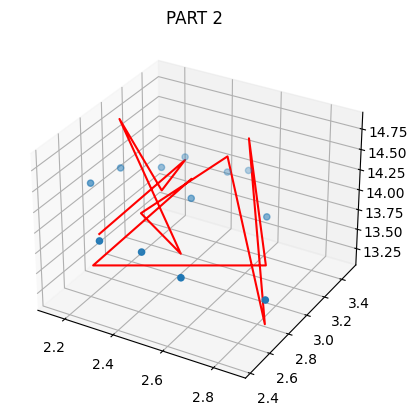

In [44]:
fig = plt.figure()
ax = plt.axes(projection= '3d')
x_1 = X_1.values
y_1 = X_2.values
z_1 = y.values
ax.scatter(x_1, y_1, result)
ax.plot(x_1, y_1, z_1, color='red')
ax.set_title('PART 2')
plt.show()

PART 3

In [45]:
X = selected_cultivar["Flavanoids"].head(30)
y = selected_cultivar["Alcohol"].head(30)

In [47]:
# sắp sếp X và y
sorted_indices = np.argsort(X)
X_s = X[sorted_indices]
y_s = y[sorted_indices]
P = pd.concat([X_s, y_s], axis=1).reset_index(drop= True)
print(P)
print("Chiều dài của P: ", len(P))

    Flavanoids  Alcohol
0         2.19    13.30
1         2.33    14.02
2         2.37    12.85
3         2.41    12.93
4         2.43    14.12
5         2.51    14.06
6         2.52    14.39
7         2.61    13.50
8         2.68    13.05
9         2.69    13.24
10        2.76    13.20
11        2.76    13.75
12        2.88    13.71
13        2.91    13.63
14        2.94    13.39
15        2.97    13.87
16        2.98    14.83
17        3.03    13.64
18        3.06    14.23
19        3.14    14.30
20        3.15    13.86
21        3.17    14.06
22        3.24    13.16
23        3.32    14.10
24        3.39    14.20
25        3.40    13.83
26        3.49    14.37
27        3.64    14.38
28        3.69    14.75
29        3.93    14.19
Chiều dài của P:  30


In [48]:
Q = P.values.astype('float64')
print(Q)
print("======================")
uint = np.ones((30, 1))
R = np.hstack([uint, Q])
print(R)

[[ 2.19 13.3 ]
 [ 2.33 14.02]
 [ 2.37 12.85]
 [ 2.41 12.93]
 [ 2.43 14.12]
 [ 2.51 14.06]
 [ 2.52 14.39]
 [ 2.61 13.5 ]
 [ 2.68 13.05]
 [ 2.69 13.24]
 [ 2.76 13.2 ]
 [ 2.76 13.75]
 [ 2.88 13.71]
 [ 2.91 13.63]
 [ 2.94 13.39]
 [ 2.97 13.87]
 [ 2.98 14.83]
 [ 3.03 13.64]
 [ 3.06 14.23]
 [ 3.14 14.3 ]
 [ 3.15 13.86]
 [ 3.17 14.06]
 [ 3.24 13.16]
 [ 3.32 14.1 ]
 [ 3.39 14.2 ]
 [ 3.4  13.83]
 [ 3.49 14.37]
 [ 3.64 14.38]
 [ 3.69 14.75]
 [ 3.93 14.19]]
[[ 1.    2.19 13.3 ]
 [ 1.    2.33 14.02]
 [ 1.    2.37 12.85]
 [ 1.    2.41 12.93]
 [ 1.    2.43 14.12]
 [ 1.    2.51 14.06]
 [ 1.    2.52 14.39]
 [ 1.    2.61 13.5 ]
 [ 1.    2.68 13.05]
 [ 1.    2.69 13.24]
 [ 1.    2.76 13.2 ]
 [ 1.    2.76 13.75]
 [ 1.    2.88 13.71]
 [ 1.    2.91 13.63]
 [ 1.    2.94 13.39]
 [ 1.    2.97 13.87]
 [ 1.    2.98 14.83]
 [ 1.    3.03 13.64]
 [ 1.    3.06 14.23]
 [ 1.    3.14 14.3 ]
 [ 1.    3.15 13.86]
 [ 1.    3.17 14.06]
 [ 1.    3.24 13.16]
 [ 1.    3.32 14.1 ]
 [ 1.    3.39 14.2 ]
 [ 1.    3.4  13.83]
 [ 

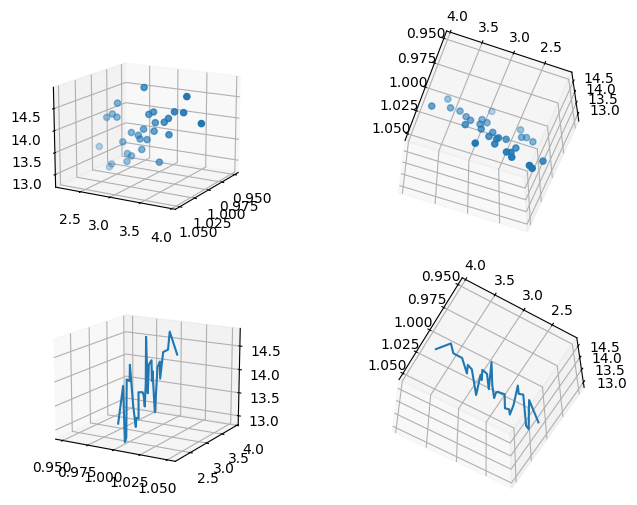

In [49]:
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(221, projection='3d')
ax2 = fig.add_subplot(222, projection='3d')
ax3 = fig.add_subplot(223, projection='3d')
ax4 = fig.add_subplot(224, projection='3d')
for ax in [ax1]:
	ax.scatter(R[:, 0], R[:, 1], R[:, 2])
for ax in [ax2]:
	ax.scatter(R[:, 0], R[:, 1], R[:, 2])
for ax in [ax3]:
	ax.plot(R[:, 0], R[:, 1], R[:, 2])
for ax in [ax4]:
	ax.plot(R[:, 0], R[:, 1], R[:, 2])
ax1.view_init(elev=15, azim=30)
ax2.view_init(elev=-60, azim=-200)
ax3.view_init(elev=15, azim=-60)
ax4.view_init(elev=-60, azim=-210)
plt.show()